In [2]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('NSE-TATAGLOBAL.csv')

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
1,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
3,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
4,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09


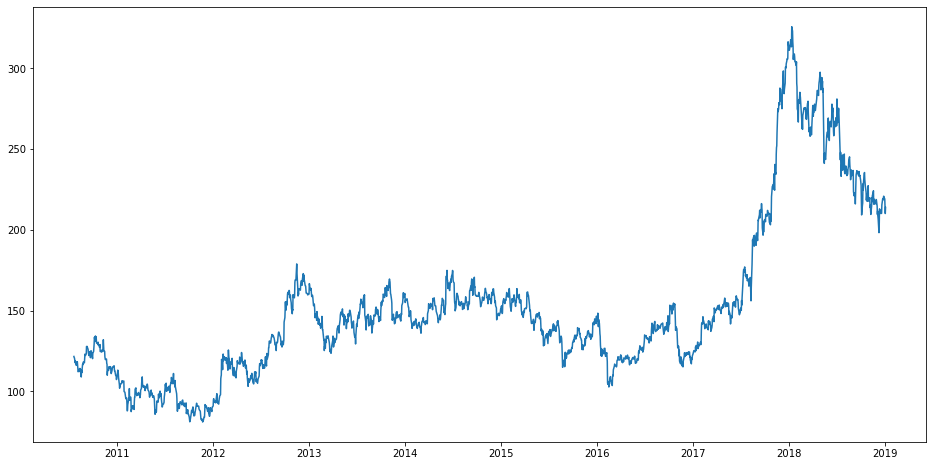

In [3]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
plt.show()

In [4]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
print(data)
print(new_data)
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.
# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

                 Date    Open    High     Low    Last   Close  \
Date                                                            
2010-07-21 2010-07-21  122.10  123.00  121.05  121.10  121.55   
2010-07-22 2010-07-22  120.30  122.00  120.25  120.75  120.90   
2010-07-23 2010-07-23  121.80  121.95  120.25  120.35  120.65   
2010-07-26 2010-07-26  120.10  121.00  117.10  117.10  117.60   
2010-07-27 2010-07-27  117.60  119.50  112.00  118.80  118.65   
...               ...     ...     ...     ...     ...     ...   
2018-12-31 2018-12-31  222.00  223.65  218.85  219.55  219.40   
2019-01-01 2019-01-01  219.95  221.05  218.05  218.95  219.10   
2019-01-02 2019-01-02  219.00  220.35  213.60  214.20  214.60   
2019-01-03 2019-01-03  214.95  215.35  209.90  210.55  210.05   
2019-01-04 2019-01-04  210.60  214.90  210.00  213.50  213.80   

            Total Trade Quantity  Turnover (Lacs)  
Date                                               
2010-07-21              658666.0           803.56 

<ipython-input-7-51ea2c681073>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-7-51ea2c681073>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


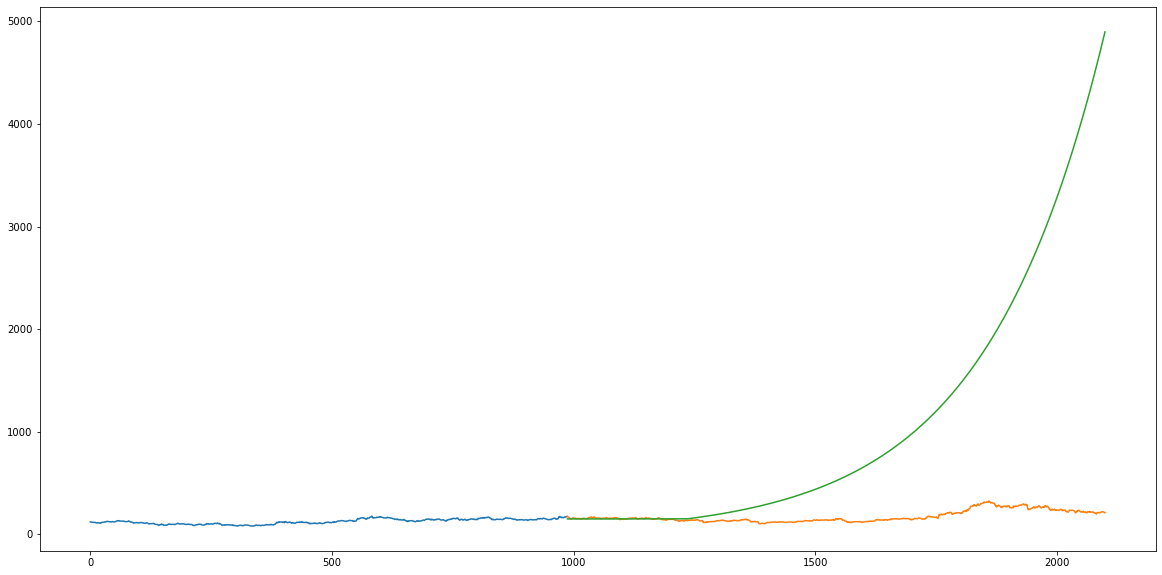

In [7]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [6]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2019-01-04,2019-01-04,210.60,214.90,210.00,213.50,213.80,1213181.0,2583.05
2019-01-03,2019-01-03,214.95,215.35,209.90,210.55,210.05,2096553.0,4433.50
2019-01-02,2019-01-02,219.00,220.35,213.60,214.20,214.60,1081778.0,2340.31
2019-01-01,2019-01-01,219.95,221.05,218.05,218.95,219.10,716275.0,1571.63
2018-12-31,2018-12-31,222.00,223.65,218.85,219.55,219.40,965858.0,2131.09
...,...,...,...,...,...,...,...,...
2010-07-27,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100.0,694.98
2010-07-26,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-23,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312.0,340.31


In [26]:
data=[[[1,2],[3,4]],[[5,6],[7,8]]]
def fun(m):
    v=m[0][0]
    for r in m:
        for j in r:
            if v<j:v=j
    return v
print(fun(data[0]))

4


In [12]:
arr=[[1,2,3,4],[4,5,6,7],[8,9,10,11],[12,13,14,15]]
for i in range(0,4):
    print(arr[i].pop())

4
7
11
15


In [15]:
f_1=['Apple','Berry','Cherry','papaya']
f_2=f_1
f_3=f_1[1:]
f_2[0]='Guava'
f_3[1]='Kiwi'
sum=0
for ls in (f_1,f_2,f_3):
    if ls[0]=='Guava':
        sum+=1
    if ls[1]=='Kiwi':
        sum+=20
print(sum)

22


In [17]:
a={(1,2):1,(2,3):2}
print(a[1,2])

1


In [18]:
fruit={}
def addone(index):
    if index in fruit:
        fruit[index]+=1
    else:
        fruit[index]=1
addone('Apple')
addone('Banana')
addone('apple')
print(len(fruit))

3


In [22]:
my_dict={}
my_dict[1]=1
my_dict['1']=2
my_dict[1.0]=4
sum=0
for k in my_dict:
    sum+=my_dict[k]
print(sum)

6


In [23]:
box={}
jars={}
crates={}
box['biscuit']=1
box['cake']=3
jars['jam']=4
crates['box']=box
crates['jars']=jars
print(len(crates[box]))

TypeError: unhashable type: 'dict'

In [24]:
rec={"Name":"Python","age":"20","Addr":"Nj","Country":"USA"}
id1=id(rec)
del rec
rec={"Name":"Python","age":"20","Addr":"Nj","Country":"USA"}
id2=id(rec)
print(id1==id2)

False


In [28]:
n=int(input("Enter an integer"))
out={}
for i in range(1,n+1):
    fact=1
    for j in range(1,i+1):
        fact=fact*j
        out[i]=(i*i,fact)
print(out)

Enter an integer6
{1: (1, 1), 2: (4, 2), 3: (9, 6), 4: (16, 24), 5: (25, 120), 6: (36, 720)}


In [ ]:
inp=eval(input("Enter the list with single elements,list,tuples and dictionary as []"))
print('The input list is: \n',inp)
s=0
for i in inp:
    if type(i)==list or type(i)==tuple:
         s=s+sum(i)
    elif type(i)==dict:
        a=s+sum(i.keys())
    else:
        s=s+i
print('The final sum is: ',s)


In [42]:
temp=eval(input('Enter the day name and temp of a week as {}'))
out_days=[]
for i in temp:
    if temp[i]>=32 and temp[i]<=35:
        out_days.append(i)
print(out_days)

Enter the day name and temp of a week as{}{'sun':30,'mon':32,'tue':25,'wed':35,'thr':30,'fri':30,'sat':35}
['mon', 'wed', 'sat']


In [45]:
cities=['Delhi','Mumbai','Chennai','Banglore']
pollution_level=[56,45,40,44]
out={i:j for (i,j) in zip(cities,pollution_level)}
print(out)

{'Delhi': 56, 'Mumbai': 45, 'Chennai': 40, 'Banglore': 44}


In [53]:
import operator
id_no=['20181ise349','2081ise550','20181ise560','20181ise289']
cgpa=[7.8,3.0,5.5,8.7]
advices={i:j for i,j in zip(id_no,cgpa)}
print("The advices list of prof smith are: \n",advices)

#slow learners
slow_learner=[]
for i in advices:
    if advices[i]<=4:
        slow_learner.append(i)
print("The list of slow learner are :\n",slow_learner)

#visiting schedule
order=sorted(advices.items(),key=operator.itemgetter(1))
print('The meeting schedule for prof smith is :\n',dict(order).keys())

The advices list of prof smith are: 
 {'20181ise349': 7.8, '2081ise550': 3.0, '20181ise560': 5.5, '20181ise289': 8.7}
The list of slow learner are :
 ['2081ise550']
The meeting schedule for prof smith is :
 dict_keys(['2081ise550', '20181ise560', '20181ise349', '20181ise289'])


In [59]:
def my_fact(n):
    f=1
    for i in range(1,n+1):
        f=f*i
    return(i)
num=int(input('Enter a number: '))
r=int(input("Enter r: "))
ncr=my_fact(num)/(my_fact(r)*my_fact(num-r))
print("ncr =",ncr)

Enter a number: 6
Enter r: 2
ncr = 0.75


In [61]:
def maxmin(weekly_temp):
    out=sorted(weekly_temp,key=operator.itemgetter(1))
    return(out)
import operator
weekly_temp=eval(input('Enter the daily temp in a week [[]]'))
p=maxmin(weekly_temp)
print("The coldest day is:",p[0])
print('The warmest day is :',p[len(p)-1])


Enter the daily temp in a week [[]][['sun',33],['mon',30],['tue',25],['wed',28]]
The coldest day is: ['tue', 25]
The warmest day is : ['sun', 33]
